# PyICU formatted tick labels with Matplotlib

## Background

_PyICU_ provides a Python wrapper for icu4c. It is possible to use `icu.Locale` to create an ICU Locale object that can be used to creat an `icu.NumberFormat` instance to format numbers according to the number formats defined for the locale being used.

This can then be used with `matplotlib.ticker.FuncFormatter` in order to provide locale formatted numeric tick labels.

First we create an ICU locale object, and define a function to create a number formatter instance and return a formatted number, as a string.

In this example we will use the number format used in English within India. The grouping seperators used in india, differ from English usage in other countries, and allows us to clearly distinquish the formatted Y-axis labels.

In [32]:
from icu import Locale, NumberFormat
LOC = Locale("en_IN")

def icu_formatted_digits(d, p=None, loc=None):
    if loc is None:
        loc = Locale.getRoot()
    formatter = NumberFormat.createInstance(loc)
    return formatter.format(d)


The locale object can be passed to the function in a number of ways, including:

In [33]:
print(icu_formatted_digits(112345.05, loc=LOC))
print(icu_formatted_digits(112345.05))
print(icu_formatted_digits(112345.05, loc=Locale.getFrench()))
print(icu_formatted_digits(112345.05, loc=Locale("hi_IN@numbers=deva")))
print(icu_formatted_digits(112345.05, loc=Locale.forLanguageTag("my-MM-u-nu-mymr")))

1,12,345.05
112,345.05
112 345,05
१,१२,३४५.०५
၁၁၂,၃၄၅.၀၅


## Using PyICU formatted tick labels


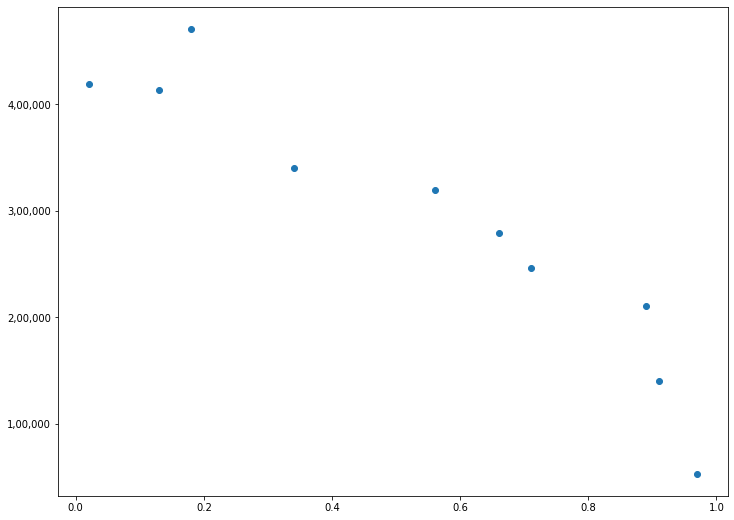

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = [0.02, 0.13, 0.18, 0.34, 0.56, 0.66, 0.71, 0.89, 0.91, 0.97]
y = [419540, 413298, 471098, 340120, 319700, 278990, 246274, 210900, 140090, 53020]

fig, ax = plt.subplots(figsize=(12,9))
mpl_formatter = ticker.FuncFormatter(lambda x, p: icu_formatted_digits(x, p, loc=LOC))
ax.get_yaxis().set_major_formatter(mpl_formatter)
ax = plt.scatter(x, y)
plt.show()